In [73]:
#import functions

import os, yaml, json, re, ast, random

#pre-defined functions
import functions

#new libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#################################################
#set variables

settingsFile = "Memex_config.yml"
settings = yaml.safe_load(open(settingsFile))
pathToMemex = settings["path_to_memex"]
pathToTfidf = settings["path_to_tfidf"]

In [74]:
#load dictionary of tf-idf terms

file = open(pathToTfidf+'/tfidfTableDic_filtered.txt', "r")

contents = file.read()

dicOfTfidf = ast.literal_eval(contents)

print("Data type: ", type(dicOfTfidf))

citeKeys_tfidf = list(dicOfTfidf.keys())

Data type:  <class 'dict'>


In [75]:
def createWordCloud(savePath, tfIdfDic):
    wc = WordCloud(width=800, height=600, background_color="white", random_state=2,
                   relative_scaling=0.5, colormap="twilight_shifted") 
    wc.generate_from_frequencies(tfIdfDic)
    # plotting
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    #plt.show() # this line will show the plot
    plt.savefig(savePath, dpi=200, bbox_inches='tight')

In [76]:
def saveWordCloudResult(pathToMemex, citationKey):
    
    publPath = functions.generatePublPath(pathToMemex, citationKey)
    saveToPath = os.path.join(publPath, citationKey + ".jpg")
    
    for key in dicOfTfidf.keys():
        if key == citationKey:
            tfIdfDic_temp = dicOfTfidf[key]
            
            
            createWordCloud(saveToPath, tfIdfDic_temp)

In [77]:
def processAllRecords(bibData):
    keys = list(bibData.keys())
    random.shuffle(keys)

    for key in keys:
        bibRecord = bibData[key]
        saveWordCloudResult(pathToMemex, bibRecord["rCite"])


NUMBER OF RECORDS IN BIBLIGORAPHY: 57


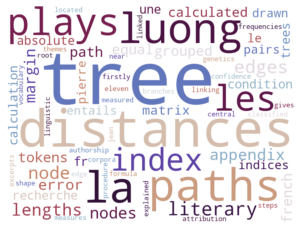

In [78]:
bibData = functions.loadBib(settings["bib_all"])
processAllRecords(bibData)